In [95]:
# Import libraries 
import pandas as pd 
import numpy as np 
import gymnasium as gym 
#import pygame
#import time
from tqdm.notebook import tqdm
import json
import ast
import matplotlib.pyplot as plt 
import seaborn as sns

In [94]:
# Start other files in the mdp folder
%run mdp/DriveGrid.py
%run mdp/pygame_.py

In [109]:
# Start the environment 
env = gym.make('DriveGrid-v0', size=144)

In [110]:
# Observe the agent interact randomly with the environment 
observation, info = env.reset()
score, history = 0, []
hor_veloc=0
vert_veloc=0

for _ in range(100):
    current_location = observation
    action = env.action_space.sample() 
    observation,reward, terminated, truncated, info = env.step(action)
    score += reward
    history.append({'s': current_location[0], 'act h_vel':current_location[1][0], 'actual v_vel': current_location[1][1] , 's_prime': observation[0], 'fut h_vel': observation[1][0], 'fut v_vel': observation[1][1], 'r': reward, 'score':score, 'stop': terminated, 'action h': action[0], 'action v': action[1]})
    if terminated or truncated:
        observation, info = env.reset()
env.close()

In [111]:
# Print the results 
print(score)
history=pd.DataFrame(history)
history.head(50)

-279


,s,act h_vel,actual v_vel,s_prime,fut h_vel,fut v_vel,r,score,stop,action h,action v
0,36,0,0,24,0,-1,-1,-1,False,0,-1
1,24,0,-1,12,0,-1,-1,-2,False,0,0
2,12,0,-1,36,0,0,-5,-7,False,-1,0
3,36,0,0,36,0,0,-5,-12,False,1,1
4,36,0,0,25,1,-1,-1,-13,False,1,-1
5,25,1,-1,13,0,-1,-1,-14,False,-1,0
6,13,0,-1,36,0,0,-5,-19,False,-1,-1
7,36,0,0,24,0,-1,-1,-20,False,0,-1
8,24,0,-1,25,1,0,-1,-21,False,1,1
9,25,1,0,13,0,-1,-1,-22,False,-1,-1


In [9]:
# PYGAME
%run mdp/pygame_.py
from mdp.pygame_ import Car
from mdp.pygame_ import draw

In [10]:
# Visualize the car trajectory in the track with the use of pygame
trajectory = list(history['s'])   
draw(trajectory)

## TABULAR QLEARNING

In [100]:
from mdp.DriveGrid_Qlearn import DriveQlearning
%run mdp/DriveGrid_Qlearn.py

In [22]:
# Set the environment with QLearning update 

learning_rate = 0.001
n_episodes = 300000
start_epsilon = 1.0
epsilon_decay = start_epsilon / (n_episodes / 2)  # reduce the exploration over time
final_epsilon = 0.1

state, _ = env.reset()

agent = DriveQlearning(
    environment=env, learning_rate=learning_rate, 
    epsilon=start_epsilon, epsilon_decay=epsilon_decay, final_epsilon=final_epsilon, gamma=.95
)

In [41]:
print(agent.Q)

{(0, (-1, -1)): -6.000019879422428, (0, (-1, 0)): -6.0021711231127615, (0, (-1, 1)): -6.002600334755104, (0, (0, -1)): -6.000503406860283, (0, (0, 0)): -6.001957619796083, (0, (0, 1)): -6.004079755348763, (0, (1, -1)): -6.001749318476731, (0, (1, 0)): -6.00176647401955, (0, (1, 1)): -5.998876539904978, (1, (-1, -1)): -6.0816300786403605, (1, (-1, 0)): -6.084700399129408, (1, (-1, 1)): -6.081875754033874, (1, (0, -1)): -6.0835299671667595, (1, (0, 0)): -6.082109503662549, (1, (0, 1)): -6.085615674878591, (1, (1, -1)): -6.081991800235484, (1, (1, 0)): -6.081837174649743, (1, (1, 1)): -6.084253573460383, (2, (-1, -1)): -5.732677352937251, (2, (-1, 0)): -5.7256050937103575, (2, (-1, 1)): -5.7267695916907995, (2, (0, -1)): -5.726760797564653, (2, (0, 0)): -5.7268057030066934, (2, (0, 1)): -5.7281493213570664, (2, (1, -1)): -5.729501274581878, (2, (1, 0)): -5.728622543792426, (2, (1, 1)): -5.726210321355799, (3, (-1, -1)): -5.668714667517167, (3, (-1, 0)): -5.668232018973299, (3, (-1, 1)): -

In [24]:
tab_env = gym.make('DriveGrid-v0', size=144)
tab_env = gym.wrappers.RecordEpisodeStatistics(tab_env, deque_size=n_episodes)
score, history_list = 0, []

for episode in tqdm(range(n_episodes)):
    observation, info = tab_env.reset()
    done = False
    while not done:
        action = agent.policy(observation[0])
        s_prime, reward, terminated, truncated, info = tab_env.step(action=action)
        score += reward
        history_list.append({'s': observation[0], 'act h_vel':observation[1][0], 'actual v_vel': observation[1][1] , 's_prime': s_prime[0], 'fut h_vel': s_prime[1][0], 'fut v_vel': s_prime[1][1], 'r': reward, 'score':score, 'stop': terminated, 'action h': action[0], 'action v': action[1]})
        agent.update(observation[0], action, reward, terminated, s_prime[0])
        done = terminated or truncated
        observation = s_prime
    agent.decay_epsilon()

  0%|          | 0/300000 [00:00<?, ?it/s]

In [40]:
# Save the trained Q
Q_values = {str(k): v for k, v in agent.Q.items()}
with open('Q_values.json', 'w') as file:
    json.dump(Q_values, file, indent=4)
    
#Reload the trained Q
with open('Q_values.json', 'r') as file:
    Q_values = json.load(file)
agent.Q = {ast.literal_eval(k): v for k, v in Q_values.items()}

In [28]:
# Other 100 iteration to visualize the rewards and trajectories 
score, reward, history_list = 0, 0, []
#history = history.iloc[0:0]

for episode in range(100):
    observation, info = env.reset()
    done = False
    while not done:
        action = agent.policy(observation[0])
        s_prime, reward, terminated, truncated, info = env.step(action=action)
        #print(f"observation: {observation}, action: {action}, reward: {reward}, s_prime: {s_prime}")
        score += reward
        history_list.append({'s': observation[0], 'act h_vel':observation[1][0], 'actual v_vel': observation[1][1] , 's_prime': s_prime[0], 'fut h_vel': s_prime[1][0], 'fut v_vel': s_prime[1][1], 'r': reward, 'score':score, 'stop': terminated, 'action h': action[0], 'action v': action[1]})
        agent.update(observation[0], action, reward, terminated, s_prime[0])
        done = terminated or truncated
        observation = s_prime
    agent.decay_epsilon()

In [29]:
# Print the results
print(score)
history=pd.DataFrame(history_list)
history.head(50)

-1006


,s,act h_vel,actual v_vel,s_prime,fut h_vel,fut v_vel,r,score,stop,action h,action v
0,36,0,0,37,1,0,-1,-1,False,1,0
1,37,1,0,27,2,-1,-1,-2,False,1,-1
2,27,2,-1,29,2,0,-1,-3,False,0,1
3,29,2,0,42,1,1,-1,-4,False,-1,1
4,42,1,1,44,2,0,-1,-5,False,1,-1
5,44,2,0,58,2,1,-1,-6,False,0,1
6,58,2,1,83,1,2,-1,-7,False,-1,1
7,83,1,2,107,0,2,-1,-8,False,-1,0
8,107,0,2,130,-1,2,-1,-9,False,-1,0
9,130,-1,2,36,0,0,-5,-14,False,-1,1


In [30]:
# Visualize the car trajectory with pygame
trajectory = list(history['s'])
draw(trajectory)

In [ ]:
# Plots
def conv(a, win=100):
    return np.convolve(a, np.ones(win), mode='same') / win

def plt_results_(env, agent_, w):
    sns.set_theme(style="whitegrid")
    #w = 10
    rewards = conv(np.array(env.return_queue).flatten(), win=w)
    lengths = conv(np.array(env.length_queue).flatten(), win=w)
    error = conv(np.array(agent_.training_error).flatten(), win=w)
    
    fig, ax = plt.subplots(figsize=(12, 4), ncols=3)
    sns.lineplot(x=range(len(rewards)), y=rewards, ax=ax[0], color='lightblue', linewidth=.4)
    ax[0].set_title('Reward (Average)')
    sns.lineplot(x=range(len(lengths)), y=lengths, ax=ax[1], color='lightblue', linewidth=.4)
    ax[1].set_title('Episode Length')
    sns.lineplot(x=range(len(error)), y=error, ax=ax[2], color='lightblue', linewidth=.2)
    ax[2].set_title('Error')
    for axis in ax:
        axis.tick_params(axis='x', labelsize=8)
        axis.tick_params(axis='y', labelsize=8)
    plt.tight_layout()
    plt.show()

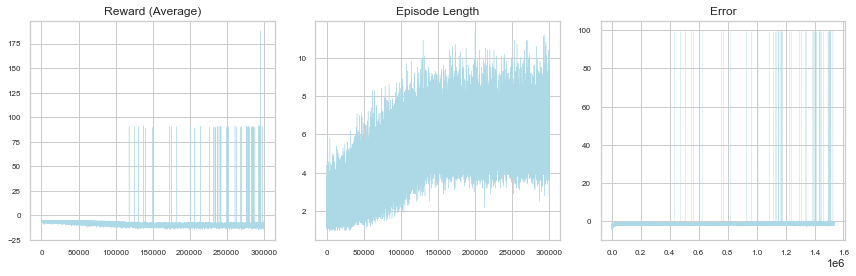

In [101]:
#plt_results(tab_env, agent, 10)
plt_results(env, agent, 10)

## VALUE FUNCTION APPROXIMATION QLEARNING

In [58]:
from mdp.DriveGrid_Qlearn import DriveQlearningVFA
%run mdp/DriveGrid_Qlearn.py

In [64]:
learning_rate = 0.001
n_episodes = 300000
start_epsilon = 1.0
epsilon_decay = start_epsilon / (n_episodes / 2)  # reduce the exploration over time
final_epsilon = 0.1

nenv = gym.make('DriveGrid-v0', size=144)
nenv = gym.wrappers.RecordEpisodeStatistics(nenv, deque_size=n_episodes)
vfa_agent = DriveQlearningVFA(
    environment=env, learning_rate=learning_rate, epsilon=start_epsilon, epsilon_decay=epsilon_decay, final_epsilon=final_epsilon, gamma=.95
)

In [65]:
score, history_list = 0, []

for episode in tqdm(range(n_episodes)):
    observation, info = nenv.reset()
    done = False
    while not done:
        action = vfa_agent.policy(observation[0])
        s_prime, reward, terminated, truncated, info = nenv.step(action=action)
        score += reward
        history_list.append({'s': observation[0], 'act h_vel':observation[1][0], 'actual v_vel': observation[1][1] , 's_prime': s_prime[0], 'fut h_vel': s_prime[1][0], 'fut v_vel': s_prime[1][1], 'r': reward, 'score':score, 'stop': terminated, 'action h': action[0], 'action v': action[1]})
        vfa_agent.update(observation[0], action, reward, s_prime[0])
        done = terminated or truncated
        observation = s_prime
    vfa_agent.decay_epsilon()

  0%|          | 0/300000 [00:00<?, ?it/s]

In [66]:
# Reload to avoid recalculating it with the training
#print(vfa_agent.w)
# vfa_agent.w = torch.tensor([
#     [ -9.3757,  -4.5598,  -2.0042,  -0.8234,  -5.6087,  -5.3093,  -1.6893, -0.6686,  -2.8183],
#     [ -3.6391,  -9.1684,  -2.0657,  -0.9958,  -1.7749,  -0.2186,  -2.2896, -5.2996,  -3.3629],
#     [ -0.0925,  -1.2505,  -8.7823,  -3.4127,  -5.6087,  -0.9226,  -6.1151, -1.7401,  -3.1017],
#     [ -1.7239,  -1.3948,  -4.2481,  -9.3677,  -0.7538,  -4.7768,  -2.3660, -5.2858,  -6.7663],
#     [ -0.0925,   1.9591,  -2.0042,   1.4227,  -5.6087,  -0.9226,  -1.6893,  2.0031,   1.5638],
#     [ -1.7141,   2.9223,   2.2714,  -0.8247,  -0.7449,  -5.3093,   1.8007, -0.6549,   1.1785],
#     [  0.1412,  -1.7951,  -0.3510,   0.1474,   0.2392,   0.3290,  -6.1151, -0.7097,  -0.3170],
#     [  3.2975,  -1.1558,   1.6019,  -1.1545,   1.9724,  -1.5965,   0.3668, -5.2996,   1.1992],
#     [ -9.3757,  -9.1684,  -8.7823,  -9.3677,  -5.6087,  -5.3093,  -6.1151, -5.2996, -11.9520]
# ], dtype=torch.float64, requires_grad=True)


tensor([[ -9.3757,  -4.5598,  -2.0042,  -0.8234,  -5.6087,  -5.3093,  -1.6893,
          -0.6686,  -2.8183],
        [ -3.6391,  -9.1684,  -2.0657,  -0.9958,  -1.7749,  -0.2186,  -2.2896,
          -5.2996,  -3.3629],
        [ -0.0925,  -1.2505,  -8.7823,  -3.4127,  -5.6087,  -0.9226,  -6.1151,
          -1.7401,  -3.1017],
        [ -1.7239,  -1.3948,  -4.2481,  -9.3677,  -0.7538,  -4.7768,  -2.3660,
          -5.2858,  -6.7663],
        [ -0.0925,   1.9591,  -2.0042,   1.4227,  -5.6087,  -0.9226,  -1.6893,
           2.0031,   1.5638],
        [ -1.7141,   2.9223,   2.2714,  -0.8247,  -0.7449,  -5.3093,   1.8007,
          -0.6549,   1.1785],
        [  0.1412,  -1.7951,  -0.3510,   0.1474,   0.2392,   0.3290,  -6.1151,
          -0.7097,  -0.3170],
        [  3.2975,  -1.1558,   1.6019,  -1.1545,   1.9724,  -1.5965,   0.3668,
          -5.2996,   1.1992],
        [ -9.3757,  -9.1684,  -8.7823,  -9.3677,  -5.6087,  -5.3093,  -6.1151,
          -5.2996, -11.9520]], dtype=torch.float6

In [105]:
score, history_list_vfa = 0, []

for episode in tqdm(range(100)):
    observation, info = nenv.reset()
    done = False
    while not done:
        action = vfa_agent.policy(observation[0])
        s_prime, reward, terminated, truncated, info = nenv.step(action=action)
        score += reward
        history_list_vfa.append({'s': observation[0], 'act h_vel':observation[1][0], 'actual v_vel': observation[1][1] , 's_prime': s_prime[0], 'fut h_vel': s_prime[1][0], 'fut v_vel': s_prime[1][1], 'r': reward, 'score':score, 'stop': terminated, 'action h': action[0], 'action v': action[1]})
        vfa_agent.update(observation[0], action, reward, s_prime[0])
        done = terminated or truncated
        observation = s_prime
    vfa_agent.decay_epsilon()

  0%|          | 0/100 [00:00<?, ?it/s]

In [106]:
# Print the results 
print(score)
history_vfa=pd.DataFrame(history_list_vfa)
history_vfa.head(50)

-1541


,s,act h_vel,actual v_vel,s_prime,fut h_vel,fut v_vel,r,score,stop,action h,action v
0,36,0,0,36,0,0,-1,-1,False,0,0
1,36,0,0,36,0,0,-5,-6,False,1,1
2,36,0,0,36,0,0,-1,-7,False,0,0
3,36,0,0,36,0,0,-1,-8,False,0,0
4,36,0,0,36,0,0,-1,-9,False,0,0
5,36,0,0,36,0,0,-1,-10,False,0,0
6,36,0,0,36,0,0,-1,-11,False,0,0
7,36,0,0,36,0,0,-1,-12,False,0,0
8,36,0,0,36,0,0,-1,-13,False,0,0
9,36,0,0,36,0,0,-5,-18,False,-1,0


In [107]:
# Visualize the car trajectory with pygame
trajectory_vfa = list(history_vfa['s'])
draw(trajectory_vfa)

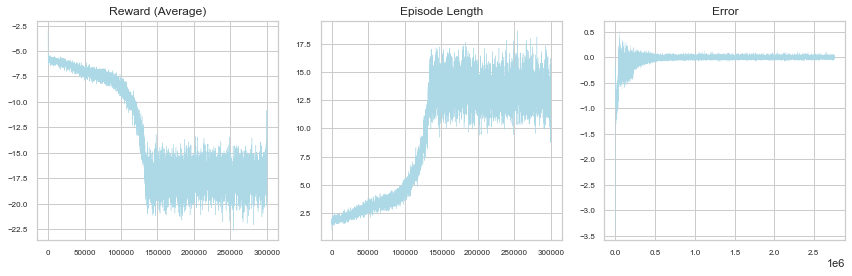

In [102]:
plt_results(nenv, vfa_agent, 100)